In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
def chinese2english(df):
    columnsDict = {
        'Length': '长度',
        'Geographic Region': '地理区域',
        'Country': '国家',
        'Listing Price': '售价',
        'Year': '年份',
        'Make Variant': '名称',
        'LWL': '水线长度',
        'Beam': '宽度',
        'Draft': '吃水',
        'Displacement': '排水',
        'Sail Area': '帆面积',
        'AVG Cargo Thro.': '平均货物吞吐量',
        'GDP': 'GDP',
        'GDP per capita': '人均GDP',
        'Average proportion of total logistics cost to GDP': '物流总成本占GDP的平均比例',
        'Hull Type': '类型',
    }
    print({v: k for k, v in columnsDict.items()})
    return df.rename(columns={v: k for k, v in columnsDict.items()})

In [ ]:
df = pd.read_excel('../T1/数据预处理/xlsx/合并修正缩放后总数据.xlsx', sheet_name='已编码汇总')
df = chinese2english(df)
df

In [ ]:
priceDf = df.pop('Listing Price')
priceDf

In [ ]:
df1 = df.iloc[:, :6]
df1.insert(0, 'Listing Price', priceDf)
sns.pairplot(df1)

In [ ]:
df2 = df.iloc[:, 6:12]
df2.insert(0, 'Listing Price', priceDf)
sns.pairplot(df2)

In [ ]:
df2 = df.iloc[:, 12:16]
df2.insert(0, 'Listing Price', priceDf)
sns.pairplot(df2)

{'长度': 'Length', '地理区域': 'Geographic Region', '国家': 'Country', '售价': 'Listing Price', '年份': 'Year', '名称': 'Make Variant', '水线长度': 'LWL', '宽度': 'Beam', '吃水': 'Draft', '排水': 'Displacement', '帆面积': 'Sail Area', '平均货物吞吐量': 'AVG Cargo Thro.', 'GDP': 'GDP', '人均GDP': 'GDP per capita', '物流总成本占GDP的平均比例': 'Average proportion of total logistics cost to GDP', '类型': 'Hull Type'}


<Figure size 800x600 with 0 Axes>

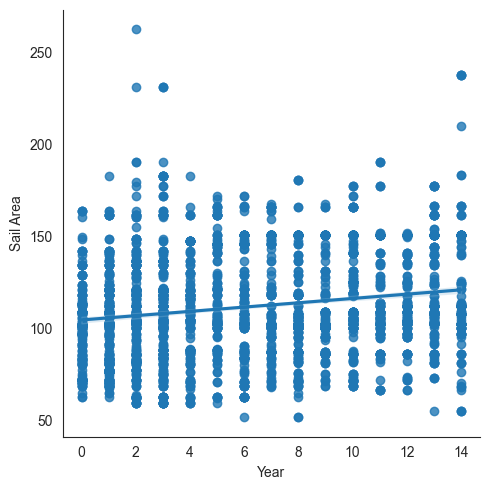

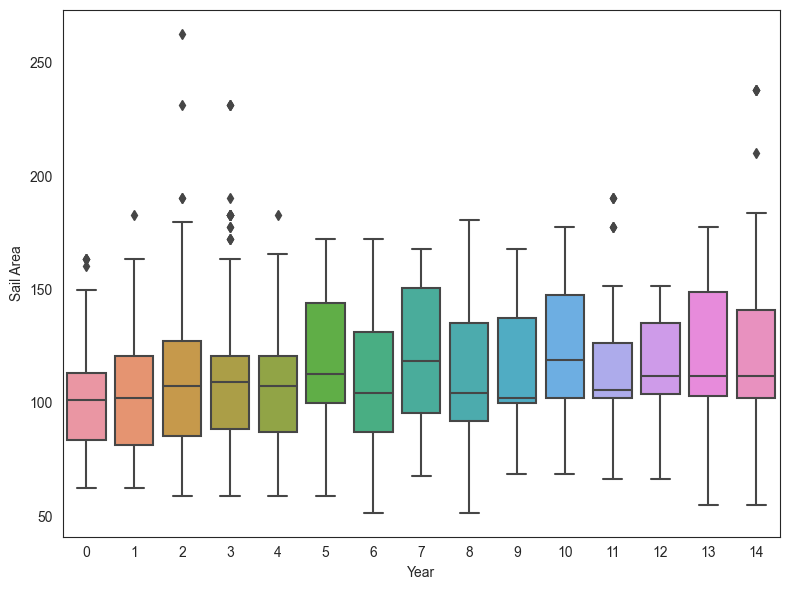

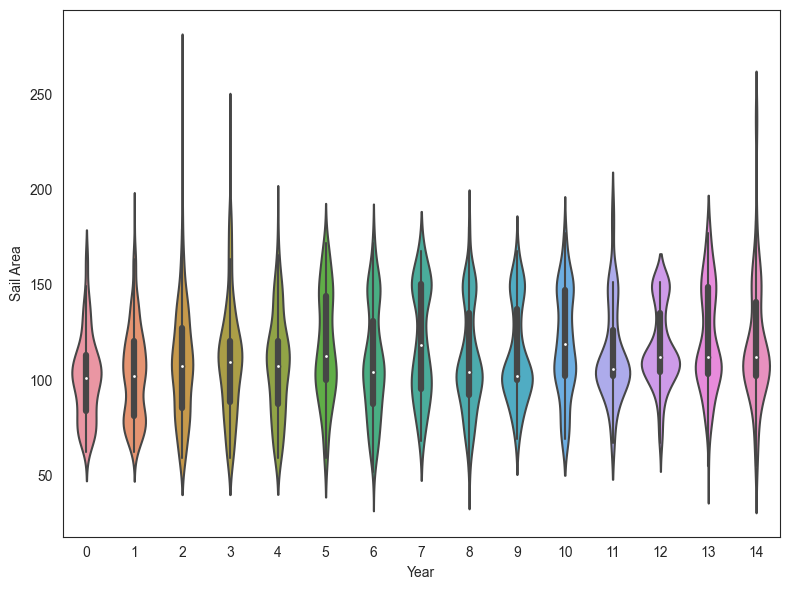

<Figure size 800x600 with 0 Axes>

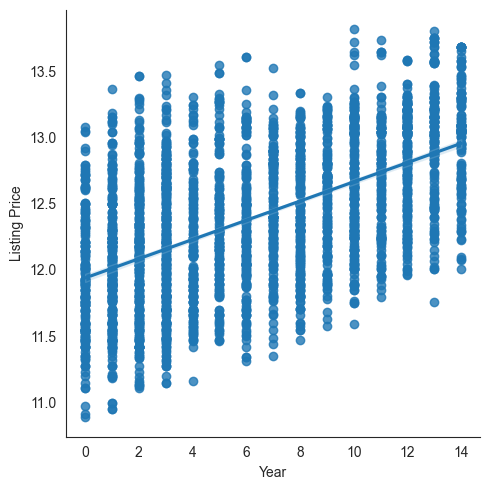

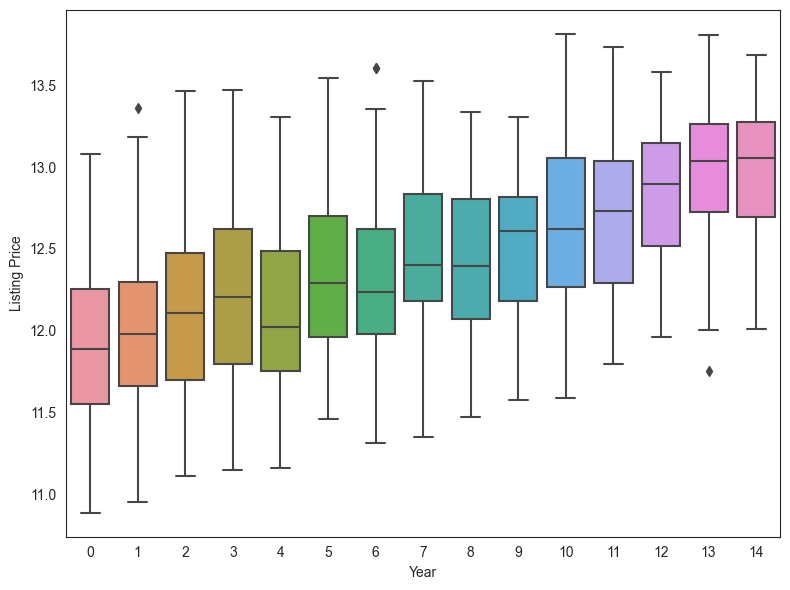

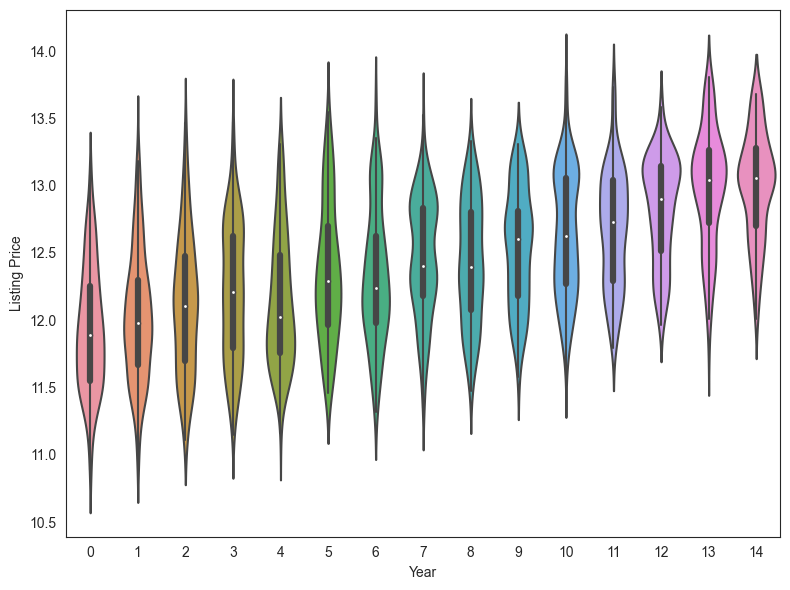

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('white')

df = pd.read_excel('../T1/数据预处理/xlsx/合并修正缩放后总数据.xlsx', sheet_name='已编码汇总')
df = chinese2english(df)
df

# sns.lmplot(x='Year', y='Sail Area', data=df)
for col in ['Sail Area', 'Listing Price']:
    for fun in [sns.lmplot, sns.boxplot, sns.violinplot]:
        plt.figure(figsize=(8, 6))
        fun(x='Year', y=col, data=df)
        plt.tight_layout()
        plt.savefig(f'{col}-{fun.__name__}.svg')
        plt.show()
